In [8]:
import solver
import network
import data
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dataloader = data.iid.TransientRLTask(batch_size = 1, seq_len = [2,2,2,2], input_dim = 100, identical = False)

In [10]:

def initialize_nets():
    D = 400

    teacher1 = network.ContinuousTeacher(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', standardize=True, normalize = True )
    teacher2 = network.ContinuousTeacher(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', standardize=True, normalize = True  )
    teacher3 = network.ContinuousTeacher(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', standardize=True, normalize = True  )
    teacher4 = network.ContinuousTeacher(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', standardize=True, normalize = True )

    teacher_c = network.ContextTeacher(input_dimension = 4, hidden_dimensions = [1], nonlinearity = 'sign', normalize = False )

    student1 = network.ContinuousStudent(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', normalize = True  )
    student2 = network.ContinuousStudent(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', normalize = True )
    student3 = network.ContinuousStudent(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', normalize = True  )
    student4 = network.ContinuousStudent(input_dimension = D, hidden_dimensions = [1], nonlinearity = 'sign', normalize = True  )

    student_c = network.ContextStudent(input_dimension = 4, hidden_dimensions = [1], nonlinearity = 'sign', normalize = False )
    
    return [teacher1, teacher2, teacher3, teacher4], [student1, student2, student3, student4], teacher_c, student_c

In [11]:
teachers, students, teacher_cs, student_cs = initialize_nets()
_, students_base, _, student_cs_base = initialize_nets()


In [12]:
VT = np.array([-0.3046, -2.6676,  2.3400,  0.5646])
VS = np.array([-0.2555,  0.6582,  0.5390,  1.1411])
ode = solver.ode.HierarchicalODESolver(VS = VS, VT = VT, lr_w = 0.1, lr_v = 1, seq_length = 2, delta = 10, N=900)

In [13]:
ode.train(5000, 1)

Text(0.5, 1.0, 'norm_s')

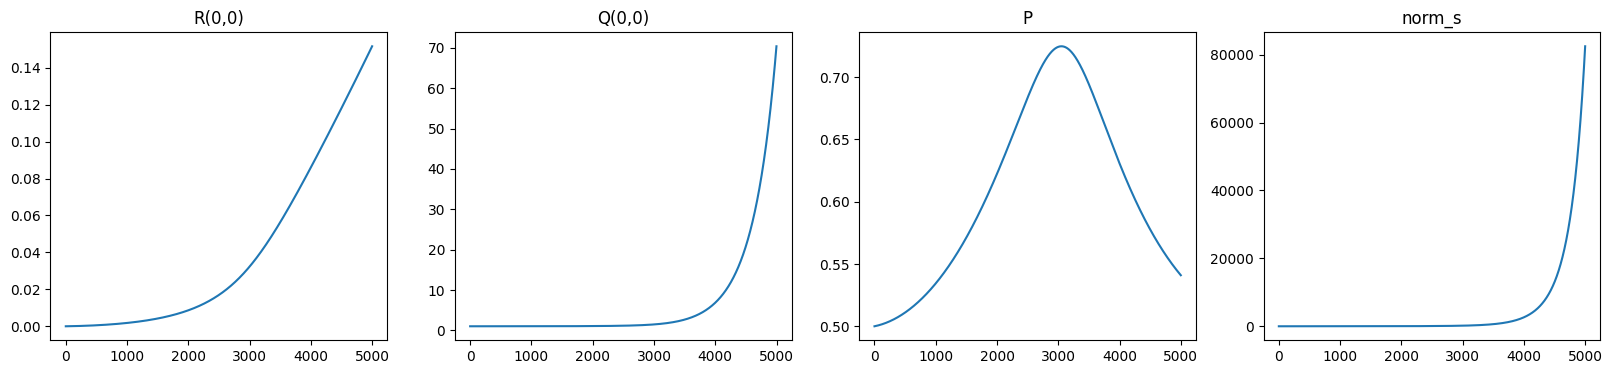

In [14]:

fig2 = plt.figure(figsize=(20, 4))
ax1 = plt.subplot(141)
R=[k[0,0] for k in ode.history['R']]
ax1.plot(R)
ax1.set_title('R(0,0)')

ax2 = plt.subplot(142)
Q=[k[0,0] for k in ode.history['Q']]
ax2.plot(Q)
ax2.set_title('Q(0,0)')

ax3 = plt.subplot(143)
P=ode.history['P']
ax3.plot(P)
ax3.set_title('P')

ax4 = plt.subplot(144)
ns=ode.history['norm_student']
ax4.plot(ns)
ax4.set_title('norm_s')